In [46]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import quantity_support
import os
from astropy.constants import h, c
import astropy.units as u
from astropy.coordinates import Distance

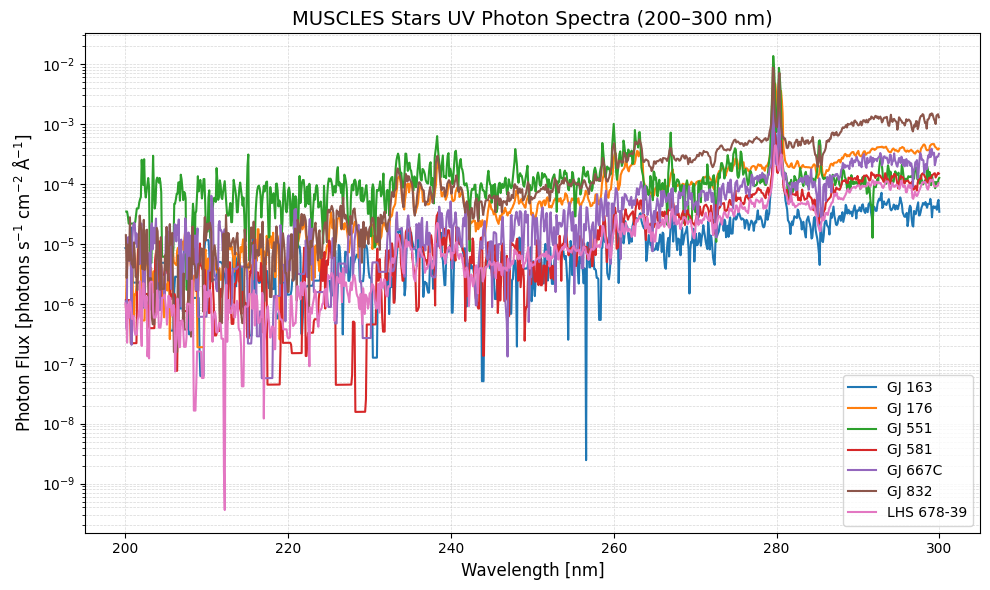

In [44]:
# Define folders and corresponding FITS filenames
folder = './MAST_2025-07-02T1723/HLSP'
star_info = {
    # "GJ 1214": f"{folder}/hlsp_muscles_gj1214/hlsp_muscles_multi_multi_gj1214_broadband_v22_adapt-const-res-sed.fits",
    "GJ 163": f"{folder}/hlsp_muscles_gj163/hlsp_muscles_multi_multi_gj163_broadband_v25_adapt-const-res-sed.fits",
    "GJ 176": f"{folder}/hlsp_muscles_gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-const-res-sed.fits",
    "GJ 551": f"{folder}/hlsp_muscles_gj551/hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits",
    "GJ 581": f"{folder}/hlsp_muscles_gj581/hlsp_muscles_multi_multi_gj581_broadband_v22_adapt-const-res-sed.fits",
    "GJ 667C": f"{folder}/hlsp_muscles_gj667c/hlsp_muscles_multi_multi_gj667c_broadband_v22_adapt-const-res-sed.fits",
    "GJ 832": f"{folder}/hlsp_muscles_gj832/hlsp_muscles_multi_multi_gj832_broadband_v22_adapt-const-res-sed.fits",
    "LHS 678-39": f"{folder}/hlsp_muscles_l-678-39/hlsp_muscles_multi_multi_l-678-39_broadband_v24_adapt-const-res-sed.fits",
    # "TRAPPIST-1": f"{folder}/hlsp_muscles_trappist-1/hlsp_muscles_multi_multi_trappist-1_broadband_v25_adapt-const-res-sed.fits",
    # "V-Eps Eri": f"{folder}/hlsp_muscles_v-eps-eri/hlsp_muscles_multi_multi_v-eps-eri_broadband_v22_adapt-const-res-sed.fits"
}

# Physical constant
hc = (h * c).to('erg * cm').value  # erg·cm

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through each star
for label, filepath in star_info.items():
    if not os.path.isfile(filepath):
        print(f"File not found: {filepath}")
        continue

    with fits.open(filepath) as hdulist:
        data = hdulist[1].data
        wavelength_angstrom = data['WAVELENGTH']
        flux_erg = data['FLUX']
        uncertainty_erg = data['ERROR']

        wavelength_nm = wavelength_angstrom / 10.0
        wavelength_cm = wavelength_angstrom * 1e-8

        # Convert energy flux to photon flux
        photon_flux = (flux_erg * wavelength_cm) / hc
        photon_uncertainty = (uncertainty_erg * wavelength_cm) / hc

        # Filter to 200–300 nm
        mask = (wavelength_nm >= 200) & (wavelength_nm <= 300)
        wl = wavelength_nm[mask]
        pf = photon_flux[mask]
        pf_err = photon_uncertainty[mask]

        # Plot
        plt.plot(wl, pf, label=label)
        # plt.fill_between(wl, pf - pf_err, pf + pf_err, alpha=0.3)

# Formatting
plt.xlabel("Wavelength [nm]", fontsize=12)
plt.ylabel("Photon Flux [photons s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("MUSCLES Stars UV Photon Spectra (200–300 nm)", fontsize=14)
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



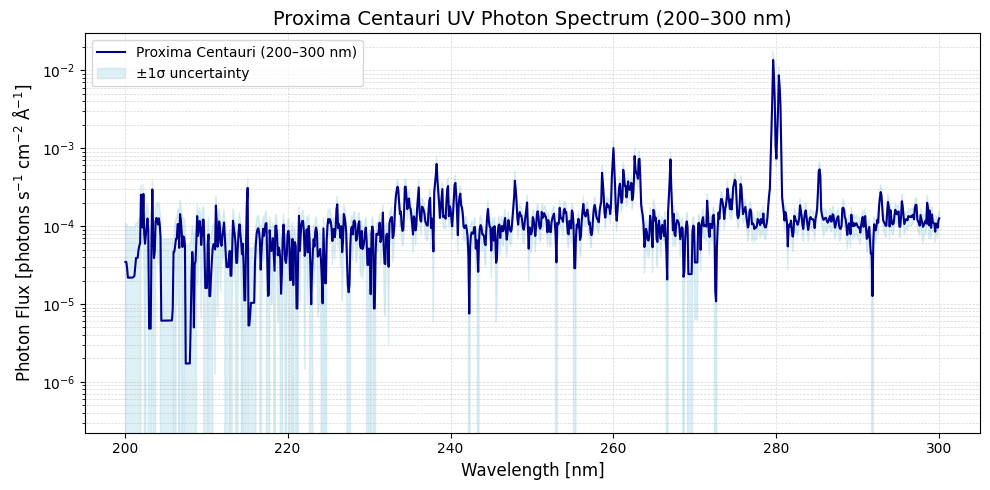

In [66]:
# Load MUSCLES spectrum
# filename = "hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
filename=f"{folder}/hlsp_muscles_gj551/hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
hdulist = fits.open(filename)
data = hdulist[1].data

# Extract wavelength and flux
wavelength_angstrom = data['WAVELENGTH']                  # in Å
flux_erg = data['FLUX']                                   # in erg s^-1 cm^-2 Å^-1
uncertainty_erg = data['ERROR']

# Convert wavelength to nm and cm
wavelength_nm = wavelength_angstrom / 10.0
wavelength_cm = wavelength_angstrom * 1e-8

# Convert energy flux to photon flux (photons s^-1 cm^-2 Å^-1)
# Photon flux = (flux * wavelength) / (h * c)
hc = (h * c).to('erg * cm')  # erg·cm
photon_flux = (flux_erg * wavelength_cm) / hc.value
photon_uncertainty = (uncertainty_erg * wavelength_cm) / hc.value

# Filter for 200–300 nm
mask = (wavelength_nm >= 200) & (wavelength_nm <= 300)
wavelength_plot = wavelength_nm[mask]
photon_flux_plot = photon_flux[mask]
photon_uncertainty_plot = photon_uncertainty[mask]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(wavelength_plot, photon_flux_plot, color='darkblue', label='Proxima Centauri (200–300 nm)')
plt.fill_between(wavelength_plot,
                 photon_flux_plot - photon_uncertainty_plot,
                 photon_flux_plot + photon_uncertainty_plot,
                 color='lightblue', alpha=0.4, label='±1σ uncertainty')

# Axes and labels
plt.xlabel("Wavelength [nm]", fontsize=12)
plt.ylabel("Photon Flux [photons s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("Proxima Centauri UV Photon Spectrum (200–300 nm)", fontsize=14)
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

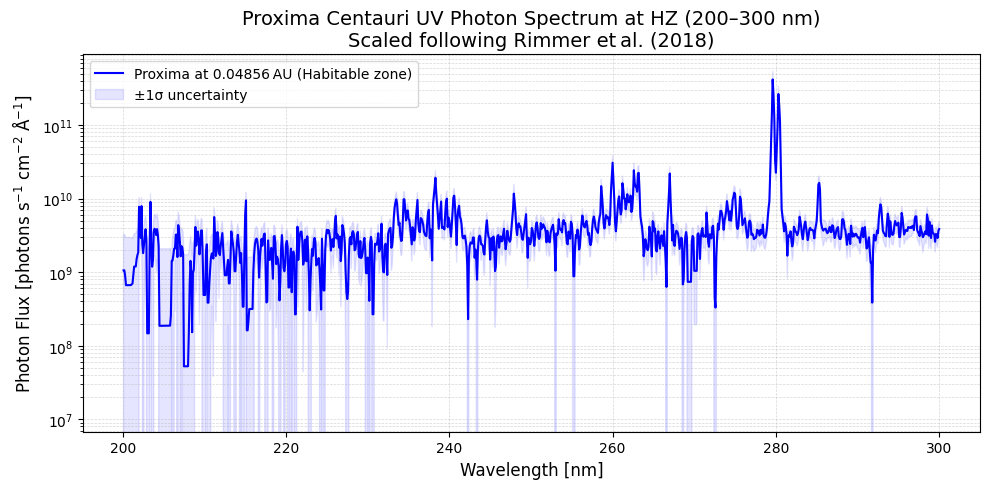

In [73]:


# # --- 1. Load the MUSCLES spectrum at Earth ---
# filename = "hlsp_muscles_multi_multi_gj551_broadband_v22_adapt-const-res-sed.fits"
# with fits.open(filename) as hdulist:
#     data = hdulist[1].data

w_ang = data['WAVELENGTH']          # Å
flux_erg = data['FLUX']             # erg s^-1 cm^-2 Å^-1
err_erg  = data['ERROR']            # erg s^-1 cm^-2 Å^-1

# convert to nm & cm
w_nm = w_ang / 10.0
w_cm = w_ang * 1e-8

# convert to photon flux at Earth: S_lambda,⊕ (photons cm^-2 s^-1 Å^-1)
hc_ergcm = (h * c).to('erg cm').value
S_earth = (flux_erg * w_cm) / hc_ergcm
S_earth_err = (err_erg * w_cm) / hc_ergcm

# --- 2. Scale to planet orbit at a = 0.04856 AU ---
# Proxima distance from Earth:
d_pc = Distance(parallax=768.5*u.mas).to(u.pc)  # or Distance("1.295 pc")
d_cm = d_pc.to(u.cm).value

a_AU = 0.04856 * u.AU
a_cm = a_AU.to(u.cm).value

scale = (d_cm / a_cm)**2
S_planet = S_earth * scale
S_planet_err = S_earth_err * scale

# --- 3. Filter to 200–300 nm and plot ---
mask = (w_nm >= 200) & (w_nm <= 300)
wl_plot = w_nm[mask]
planet_flux = S_planet[mask]
planet_err  = S_planet_err[mask]

plt.figure(figsize=(10,5))
plt.plot(wl_plot, planet_flux, color='blue',
         label=f'Proxima at 0.04856 AU (Habitable zone)')
plt.fill_between(wl_plot,
                 planet_flux - planet_err,
                 planet_flux + planet_err,
                 color='blue', alpha=0.1,
                 label='±1σ uncertainty')

plt.xlabel("Wavelength [nm]", fontsize=12)
plt.ylabel("Photon Flux [photons s$^{-1}$ cm$^{-2}$ Å$^{-1}$]", fontsize=12)
plt.title("Proxima Centauri UV Photon Spectrum at HZ (200–300 nm)\n" +
          "Scaled following Rimmer et al. (2018)", fontsize=14)
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


this is version 2.2, Rimmer et 2018 uses version 2.1, therefore slight differences are seen in the photon flux

In [76]:
def integrated_photon_flux(wavelength_nm, photon_flux, wl_min=200, wl_max=250):
    """
    Integrate the photon flux between wl_min and wl_max (in nm)
    using the trapezoidal rule, and print the bolometric photon flux
    in units of photons cm^-2 s^-1.
    """
    # select the band
    mask = (wavelength_nm >= wl_min) & (wavelength_nm <= wl_max)
    wl_band = wavelength_nm[mask]
    flux_band = photon_flux[mask]
    
    # integrate: note that flux is per Å, but wavelength axis is in nm
    # Convert wl axis to Å for proper units: 1 nm = 10 Å
    wl_A = wl_band * 10.0
    integrated = np.trapz(flux_band, wl_A)
    
    print(f"Integrated photon flux from {wl_min}–{wl_max} nm: {integrated:.3e} photons cm^-2 s^-1")
    return integrated

# --- Example of usage, after you have w_nm and S_planet defined ---
integrated_photon_flux(w_nm, S_planet)


Integrated photon flux from 200–250 nm: 1.396e+12 photons cm^-2 s^-1


1395791112378.6978

./irradiance_scaling\20250626_maya_irradiance_AbsoluteIrradiance_FlareLab_15-59-21-999.txt
./irradiance_scaling\AbsoluteIrradiance_D2lamp_18-39-34-948.txt
./irradiance_scaling\FlareLab_AbsoluteSpectrum_26052025_AbsoluteIrradiance_13-14-57-397.txt


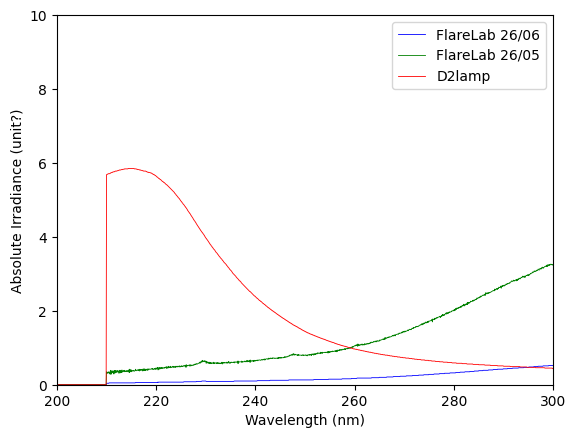

In [33]:
skip = 40

for file in glob.glob('./irradiance_scaling/*.txt'): 
    print(file)
    # if "FlareLab" and '20250626' in file:
        # x, absirr_flarelab_recent = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    # if "FlareLab" and '26052025' in file:
        # x, absirr_flarelab_old = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    if "D2lamp" in file:
        x, absirr_d2 = np.loadtxt(file,skiprows=skip,usecols=(0,1),unpack=True)
    # print(f"Background: {file}, I_background.shape = {I_background.shape}")
    
        
# plt.plot(x, absirr_flarelab_recent,'b-', lw=0.6, label='FlareLab 26/06')
# plt.plot(x, absirr_flarelab_old,'g-', lw=0.6, label='FlareLab 26/05')
plt.plot(x, absirr_d2 ,'r-', lw=0.6, label='D2lamp')

plt.xlim(200,300)
plt.xlabel('Wavelength (nm)')
plt.ylim(0,10)
plt.ylabel('Absolute Irradiance (uW/cm2/nm)')
plt.legend()